# PyORBIT output.mat comparison

Compare:
- **OG**: old PTC + CERN PyORBIT (Original - used for PS simulation campaign and benchmarked)
- **newPTC_oldMADX**: new PTC + CERN Merged PyORBIT (master + newPTC branch) MAD-X v5.02.00
- **newPTC_newMADX**: new PTC + CERN Merged PyORBIT (master + newPTC branch) MAD-X v5.06.01
- cpymad + CERN Merged PyORBIT (not yet complete)

In [1]:
import os
import glob
import imageio
import pickle
import pandas as pd
import numpy as np
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 8

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

In [3]:
def round_sig(x, sig=3):
        return round(x, sig-int(floor(log10(abs(x))))-1)
    
def is_non_zero_file(fpath):  
        print ('\n\t\t\tis_non_zero_file:: Checking file ', fpath)
        print ('\n\t\t\tis_non_zero_file:: File exists = ', os.path.isfile(fpath))
        print ('\n\t\t\tis_non_zero_file:: Size > 3 bytes = ', os.path.getsize(fpath))
        return os.path.isfile(fpath) and os.path.getsize(fpath) > 3

In [4]:
def add_input_file(dd, filename, label):
    f = filename
    p = dict()
    sio.loadmat(f, mdict=p)
    dd[label] = p
    print ('\tAdded output data from ', filename, '\t dictionary key: ', label)
    return dd

In [5]:
def make_directory(path):
    if os.path.isdir(path):
        print ("Directory %s already exists" % path)  
    else:
        try:
            os.mkdir(path)
        except OSError:
            print ("Creation of the directory %s failed" % path)
        else:
            print ("Successfully created the directory %s" % path)  

In [6]:
dd1 = dict()

dd1 = add_input_file(dd1, 'oldPTC/0_H_07/PyORBIT/output/output.mat', 'OG')
#dd1 = add_input_file(dd1, 'newPTC/0_H_07/PyORBIT/output/output.mat', 'newPTC_oldMADX')
dd1 = add_input_file(dd1, 'newPTC_newMADX/0_H_07/PyORBIT/output/output.mat', 'newPTC_newMADX')


	Added output data from  oldPTC/0_H_07/PyORBIT/output/output.mat 	 dictionary key:  OG
	Added output data from  newPTC_newMADX/0_H_07/PyORBIT/output/output.mat 	 dictionary key:  newPTC_newMADX


In [7]:
dd1['OG'].keys()

dict_keys(['__header__', '__version__', '__globals__', 'eps_z', 'D_x', 'D_y', 'mu_y', 'kurtosis_yp_6sig', 'kurtosis_yp', 'orbit_x_max', 'kurtosis_y', 'intensity', 'mu_yp', 'kurtosis_z_6sig', 'min_yp', 'cumulative_time', 'eff_beta_y', 'eff_beta_x', 'kurtosis_y_6sig', 'orbit_y_min', 'kurtosis_x', 'min_x', 'mu_z', 'epsn_y', 'epsn_x', 'beta_y', 'beta_x', 'max_xp', 'mean_yp', 'sig_dE', 'dpp_rms', 'Qy', 'eff_epsn_y', 'eff_epsn_x', 'mean_x', 'mean_y', 'mean_z', 'min_dE', 'kurtosis_x_6sig', 'max_z', 'mu_dE', 'max_x', 'max_y', 'n_mp', 'mean_dE', 'Qx', 'kurtosis_xp_6sig', 'sig_yp', 'sig_y', 'sig_x', 'min_xp', 'orbit_x_min', 'max_yp', 'kurtosis_z', 'eff_alpha_x', 'eff_alpha_y', 'mu_xp', 'turn_time', 'alpha_x', 'alpha_y', 'mean_xp', 'bunchlength', 'turn_duration', 'sig_z', 'kurtosis_dE', 'mu_x', 'orbit_y_max', 'min_y', 'turn', 'sig_xp', 'max_dE', 'kurtosis_dE_6sig', 'min_z', 'kurtosis_xp', 'gamma'])

In [8]:
sc = 'NoSC'
legend_label = 'Case'
main_label = 'PTC Test: PS IB'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
#betagamma = 2.492104532 * 0.9159915293879255
save_folder = 'Plots'
make_directory(save_folder)

Directory Plots already exists


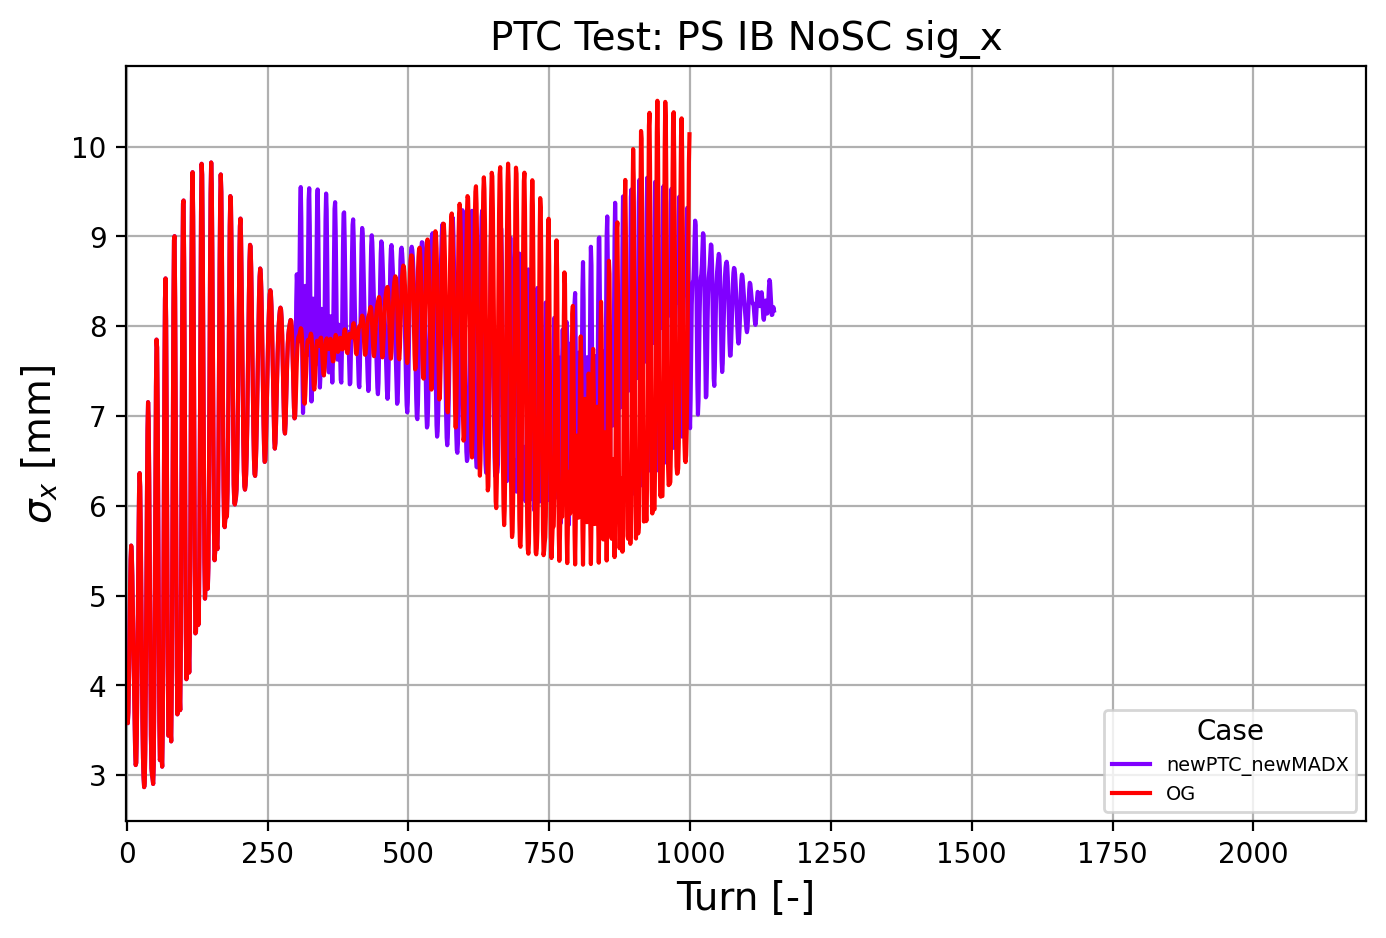

In [9]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

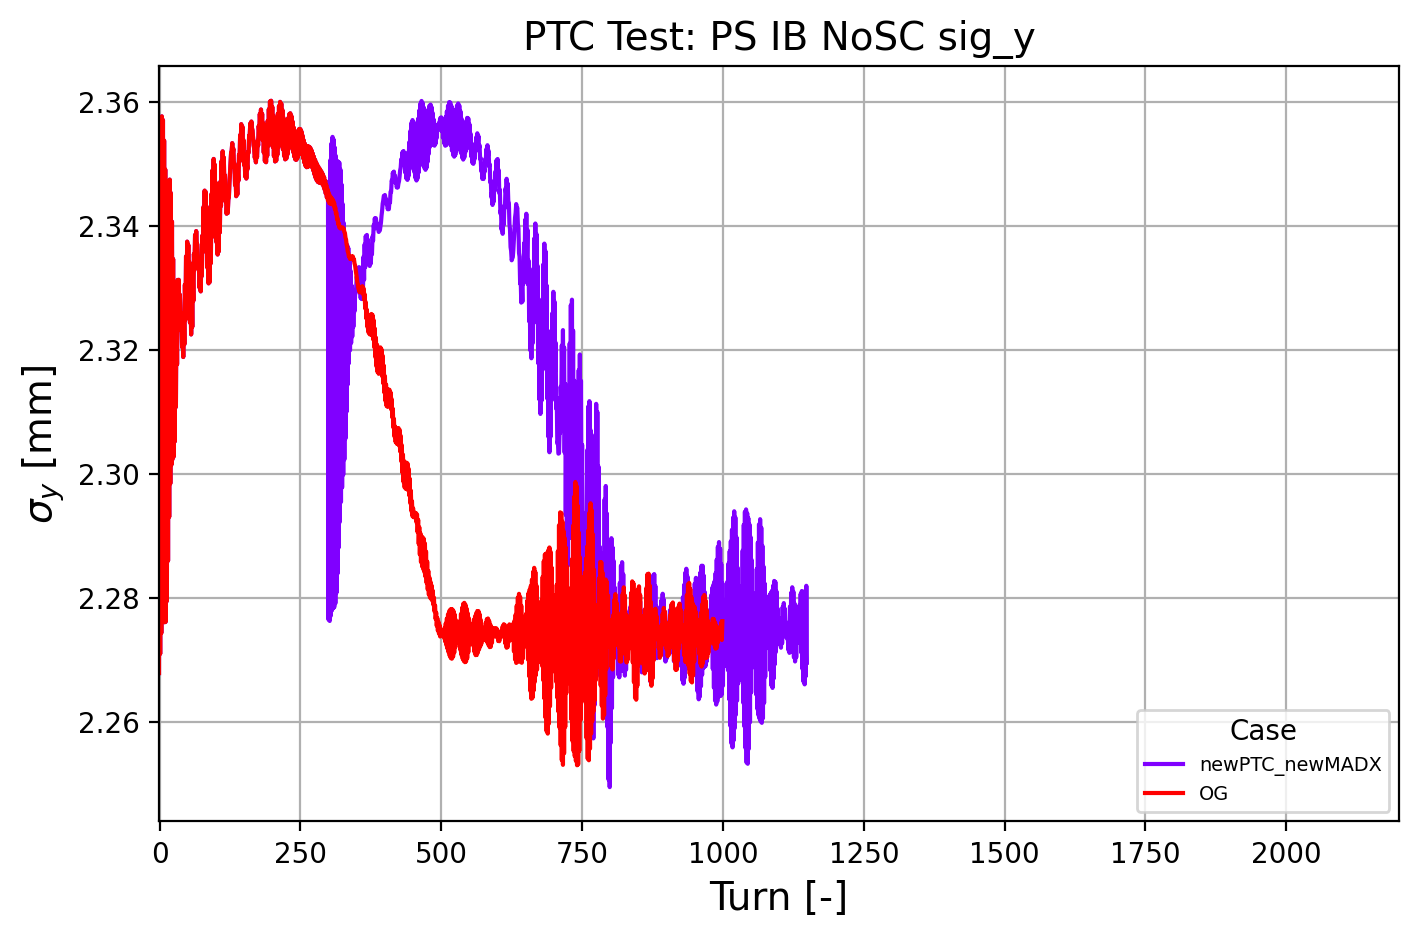

In [10]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

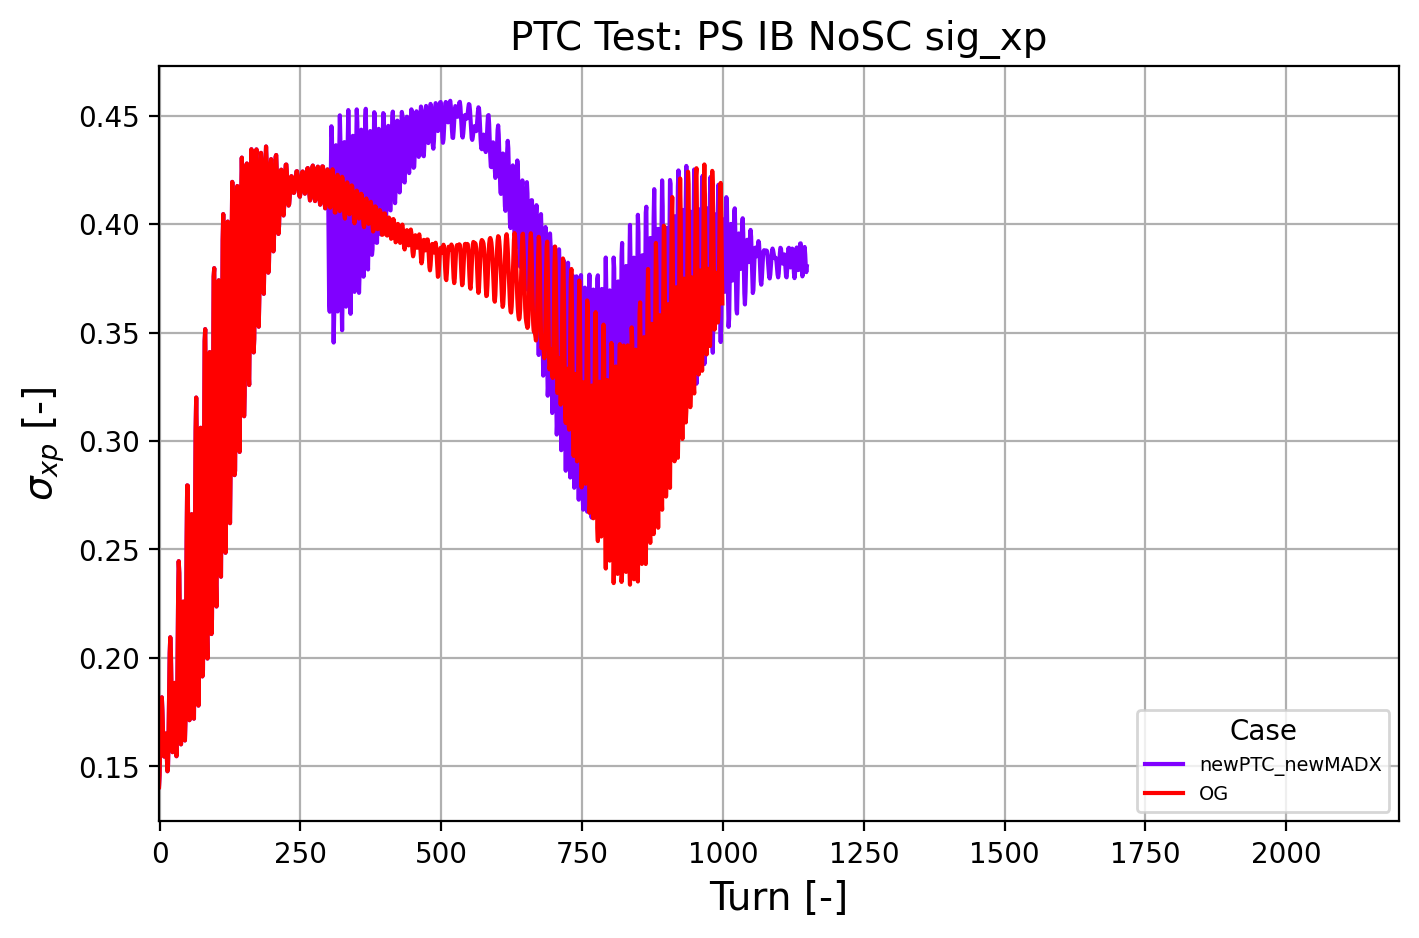

In [11]:
parameter = 'sig_xp'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_{xp}$ [-]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

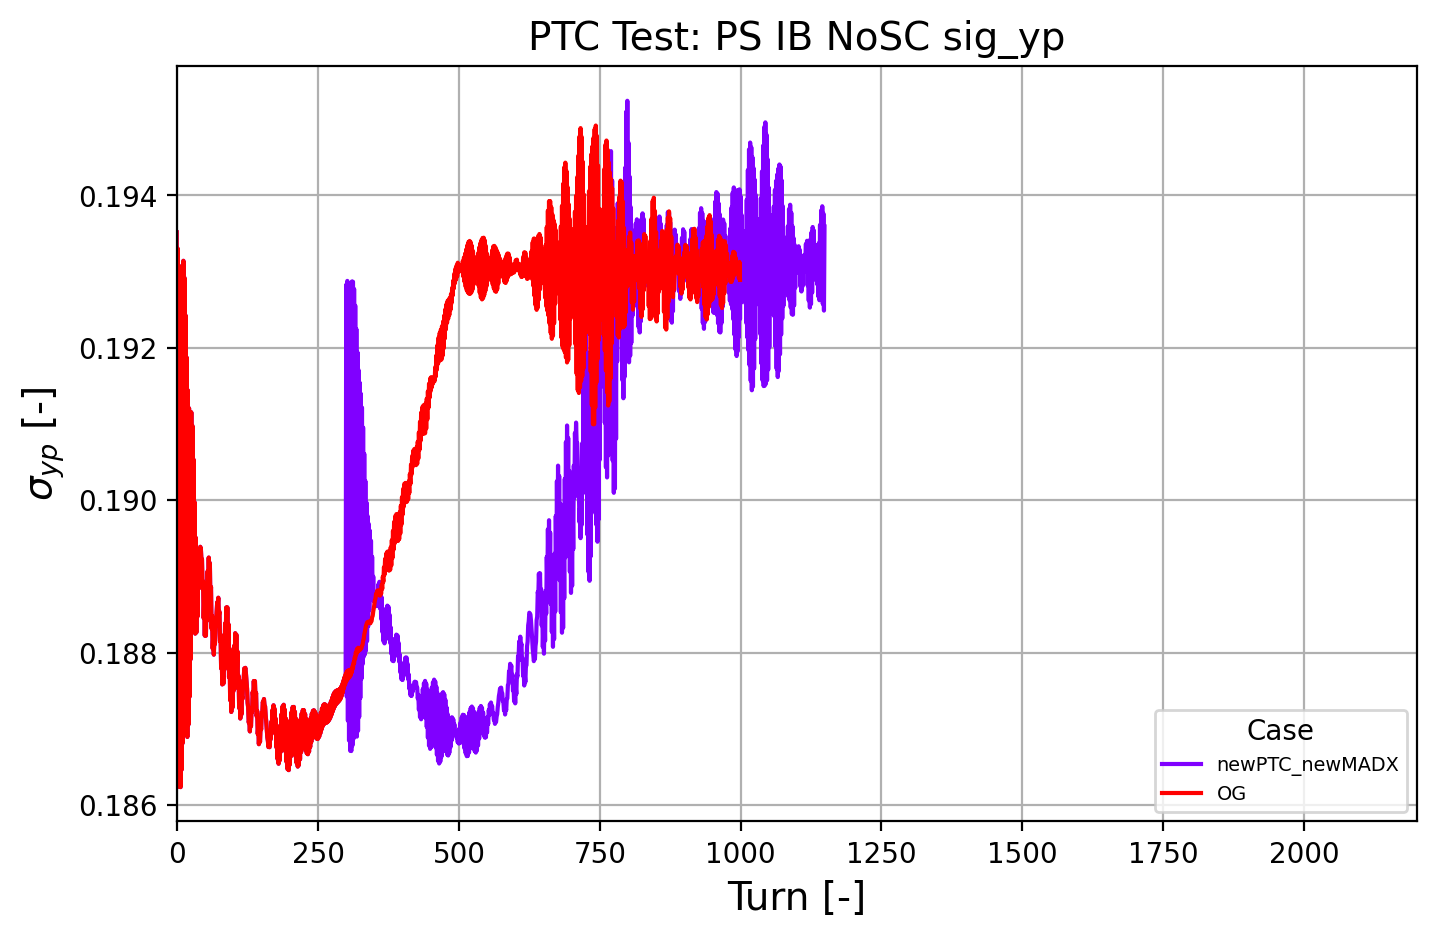

In [12]:
parameter = 'sig_yp'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_{yp}$ [-]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

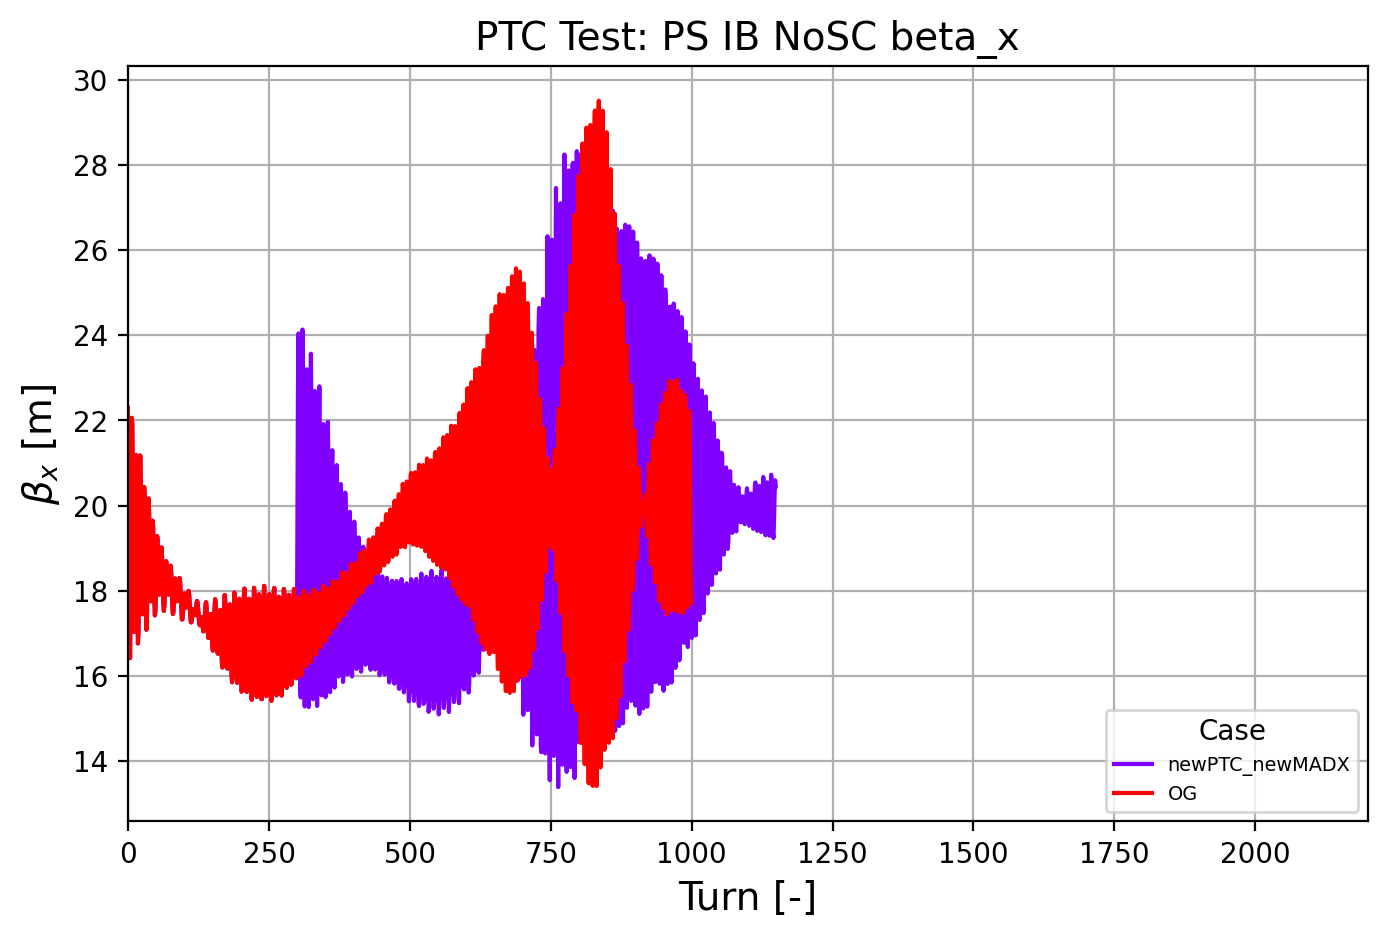

In [13]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

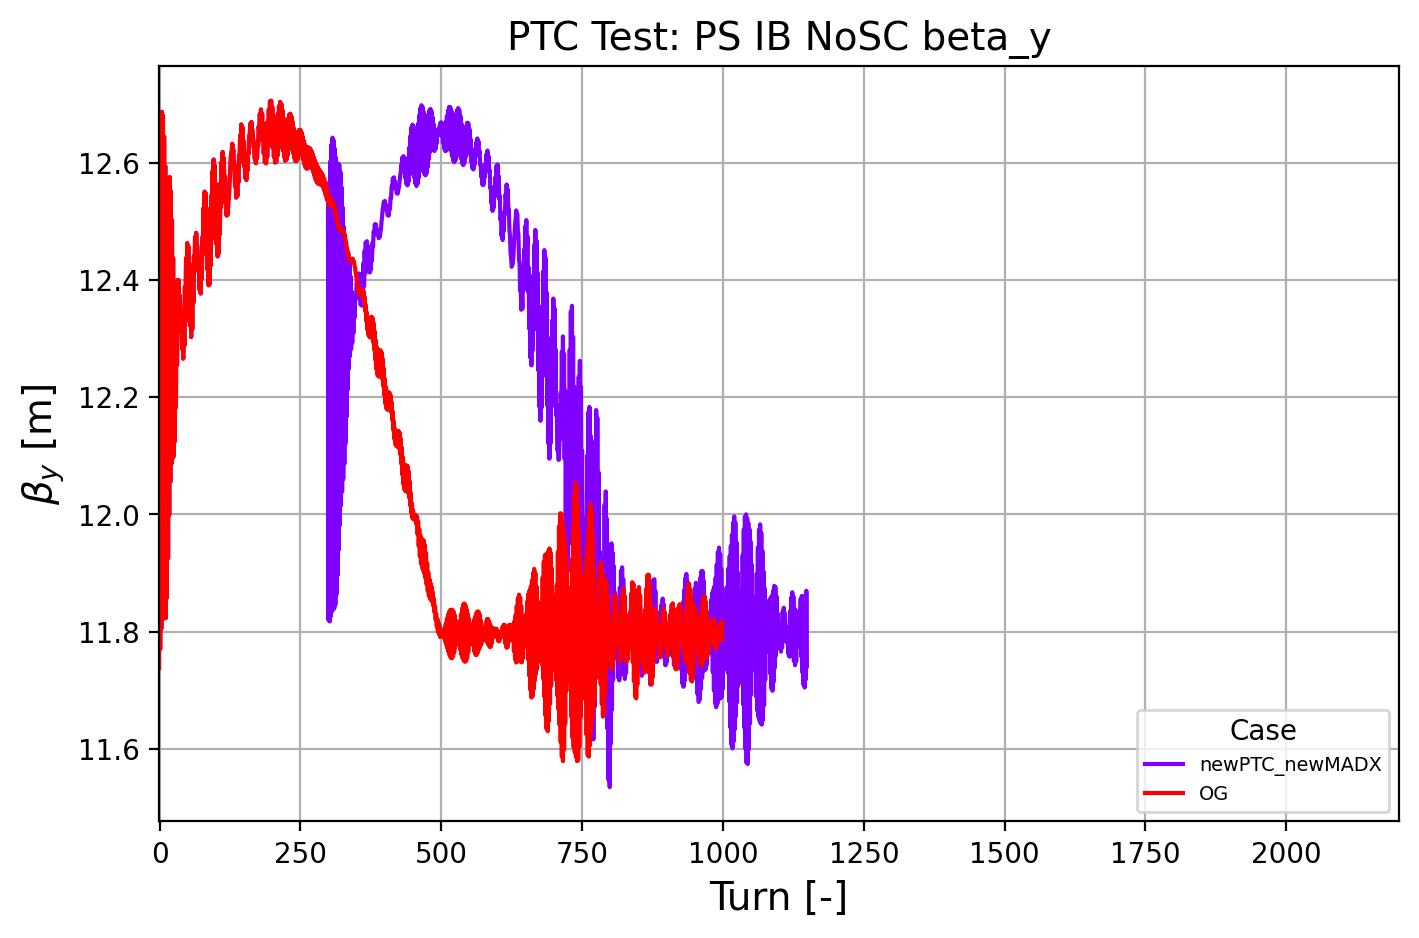

In [14]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

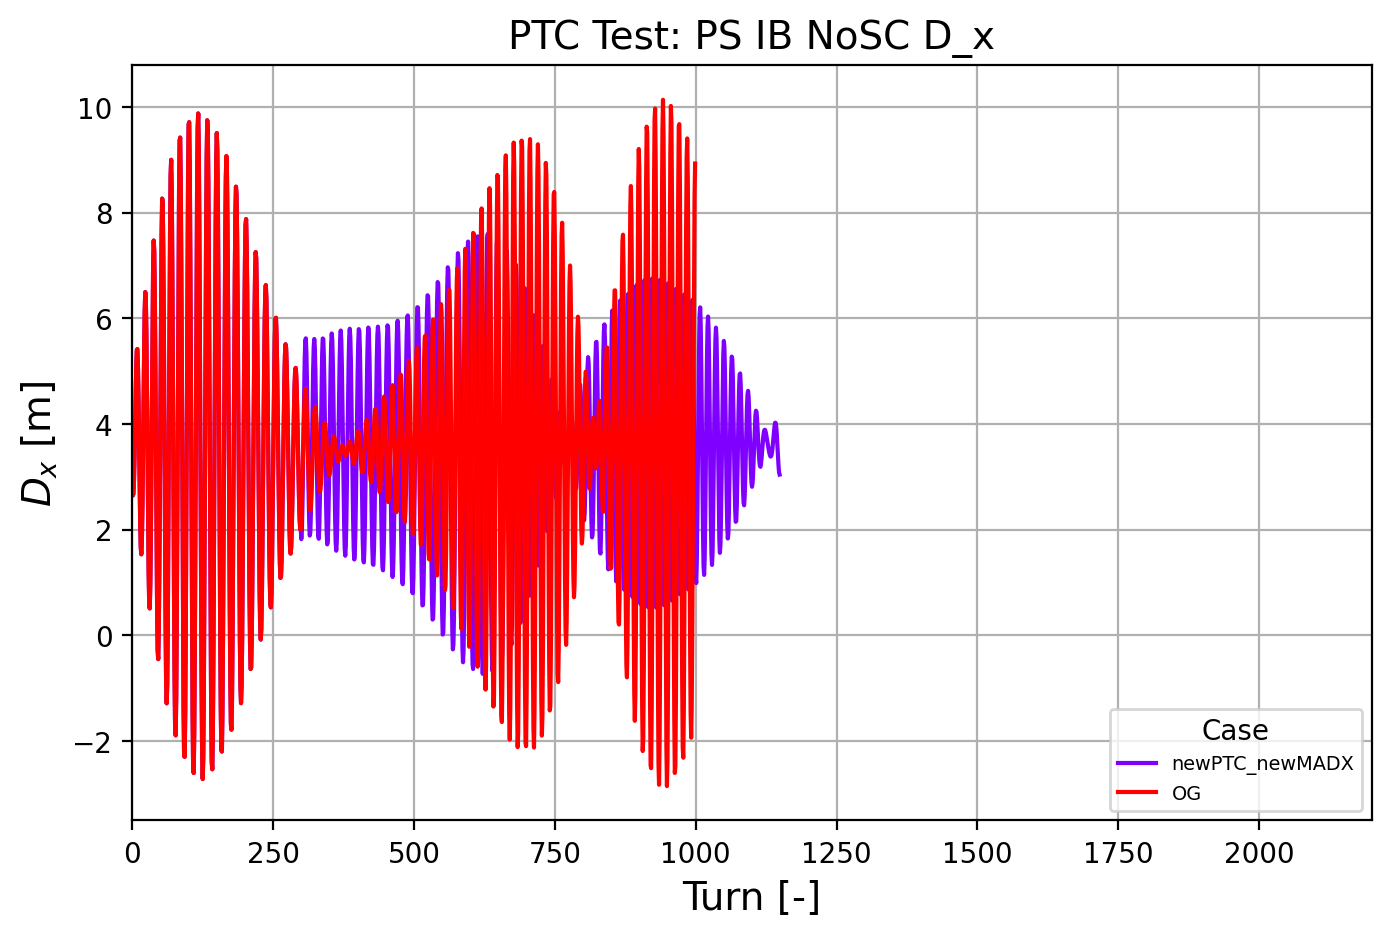

In [15]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

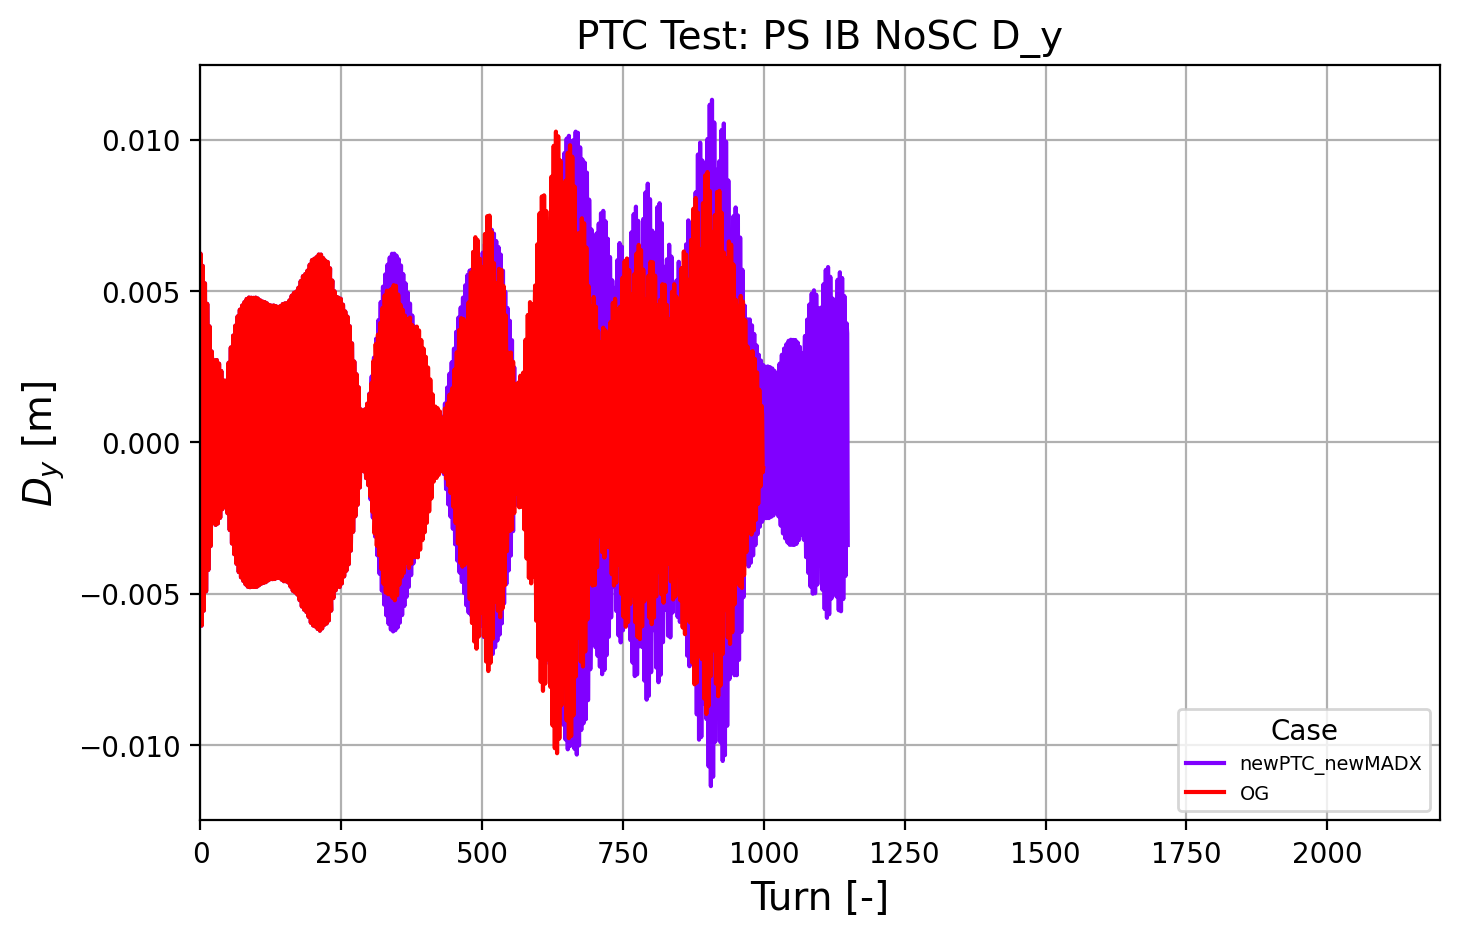

In [16]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

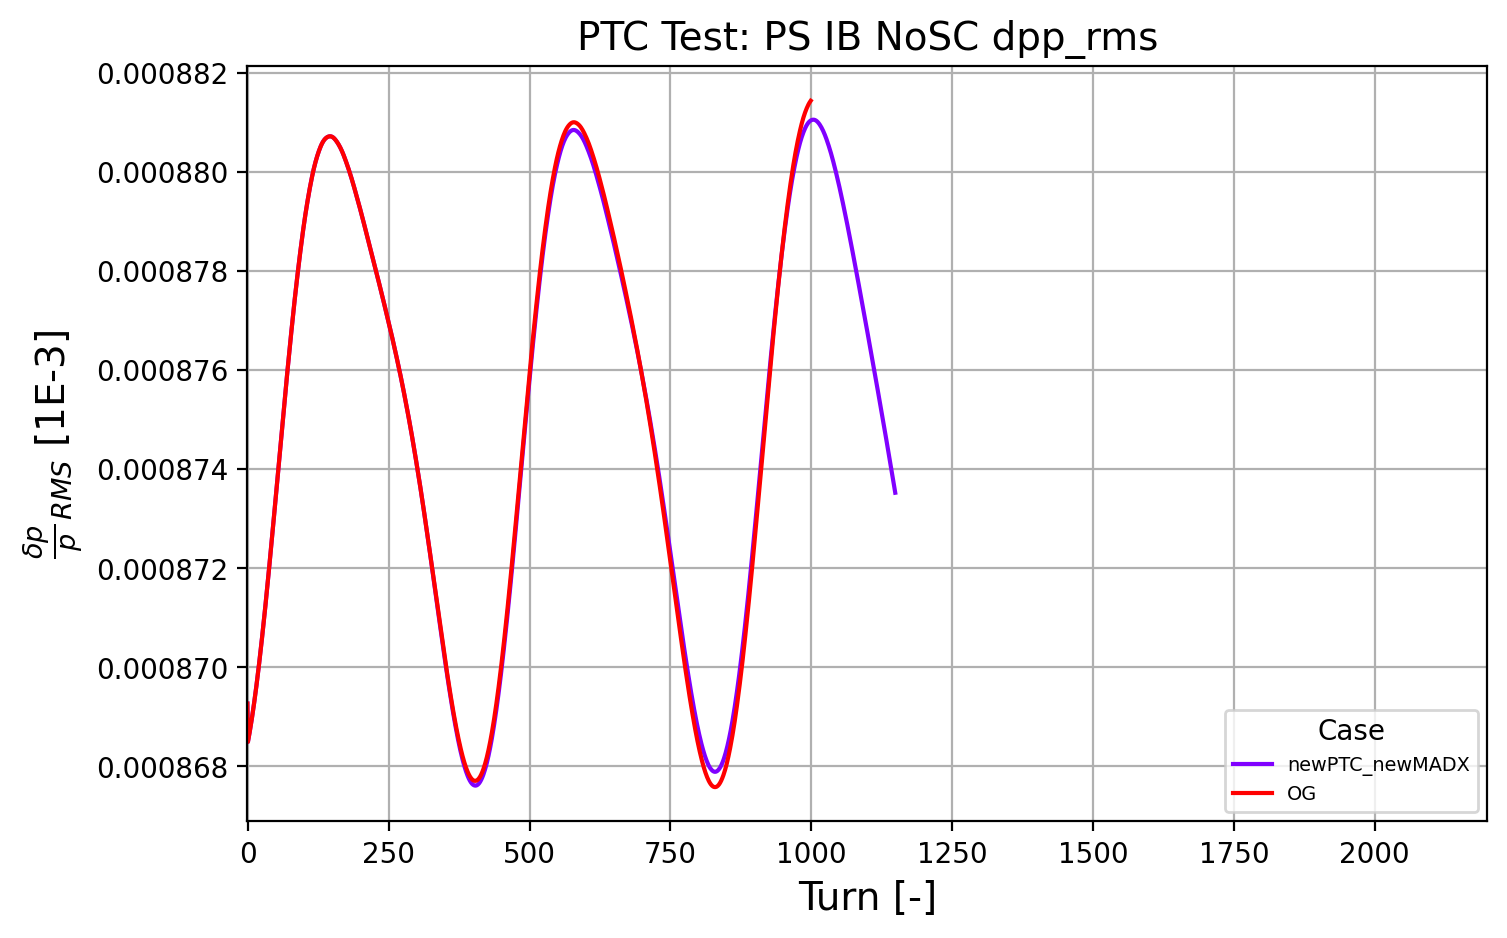

In [17]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

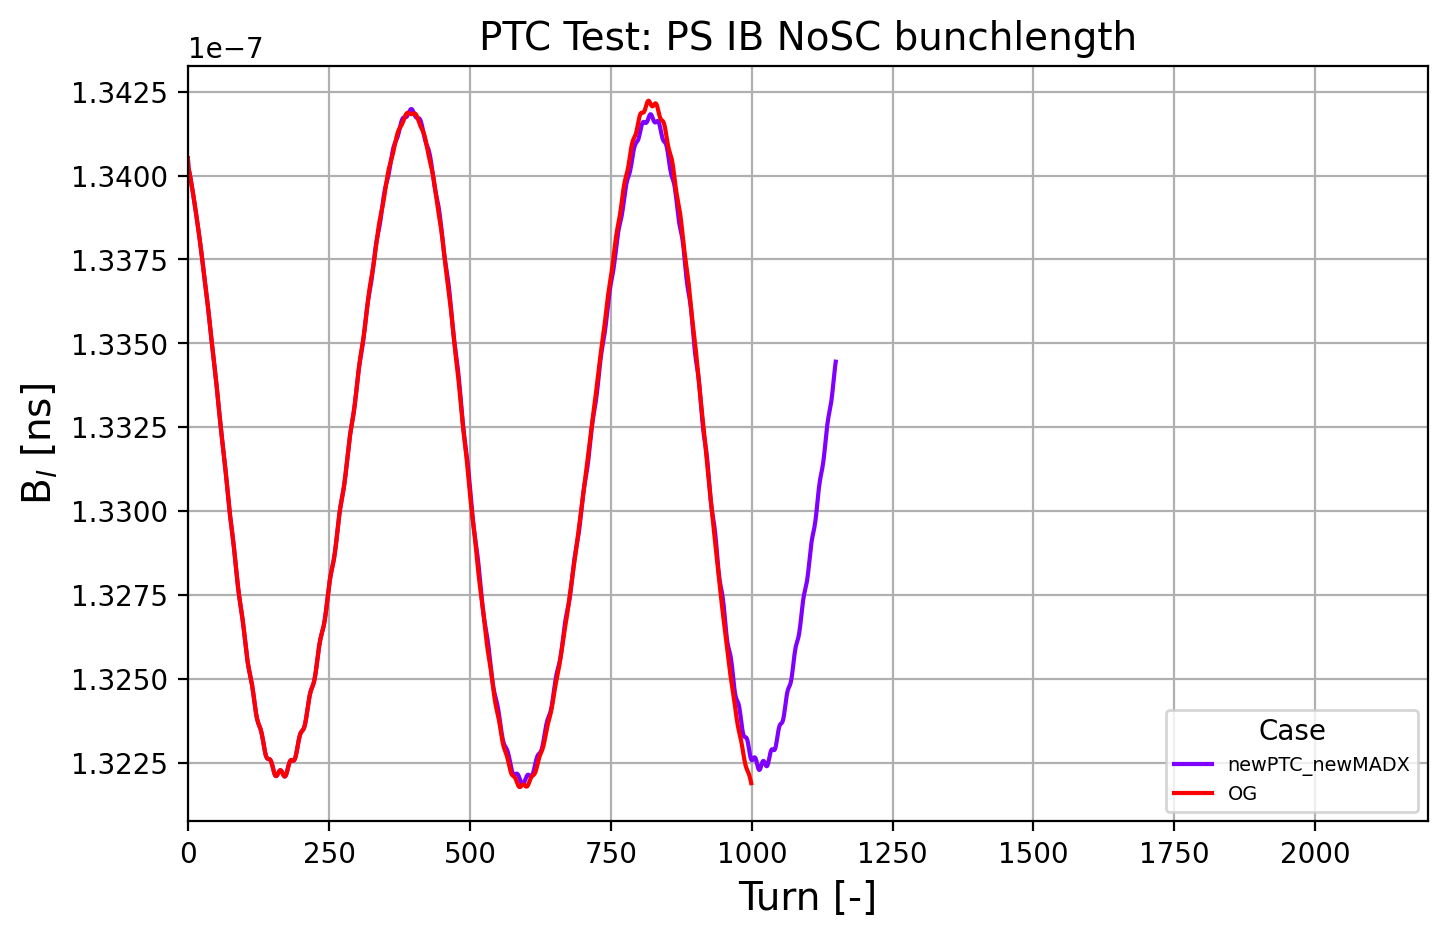

In [18]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

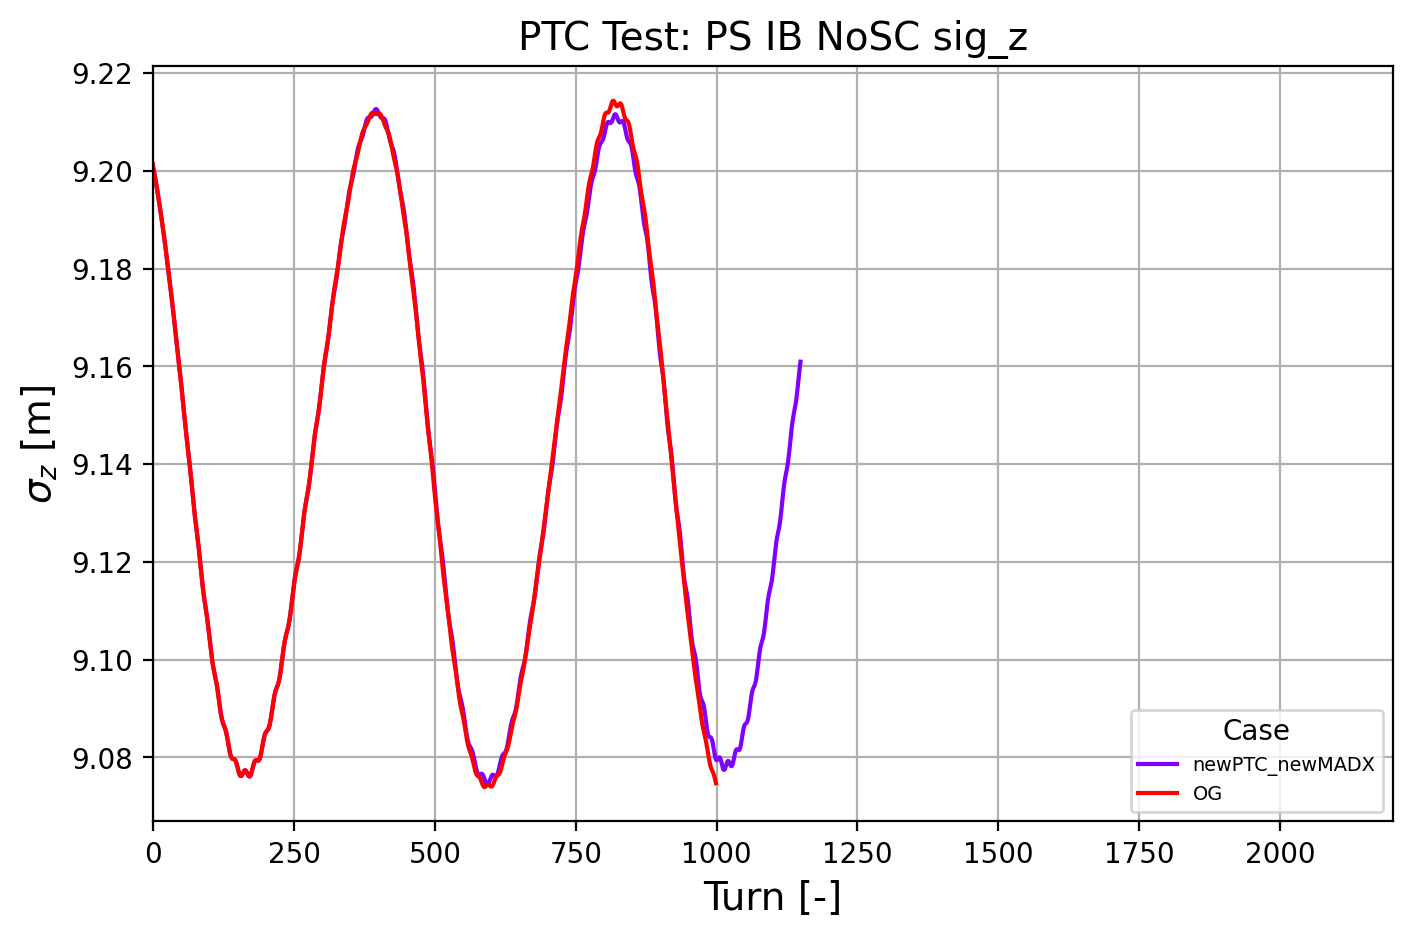

In [19]:
parameter = 'sig_z'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_z$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

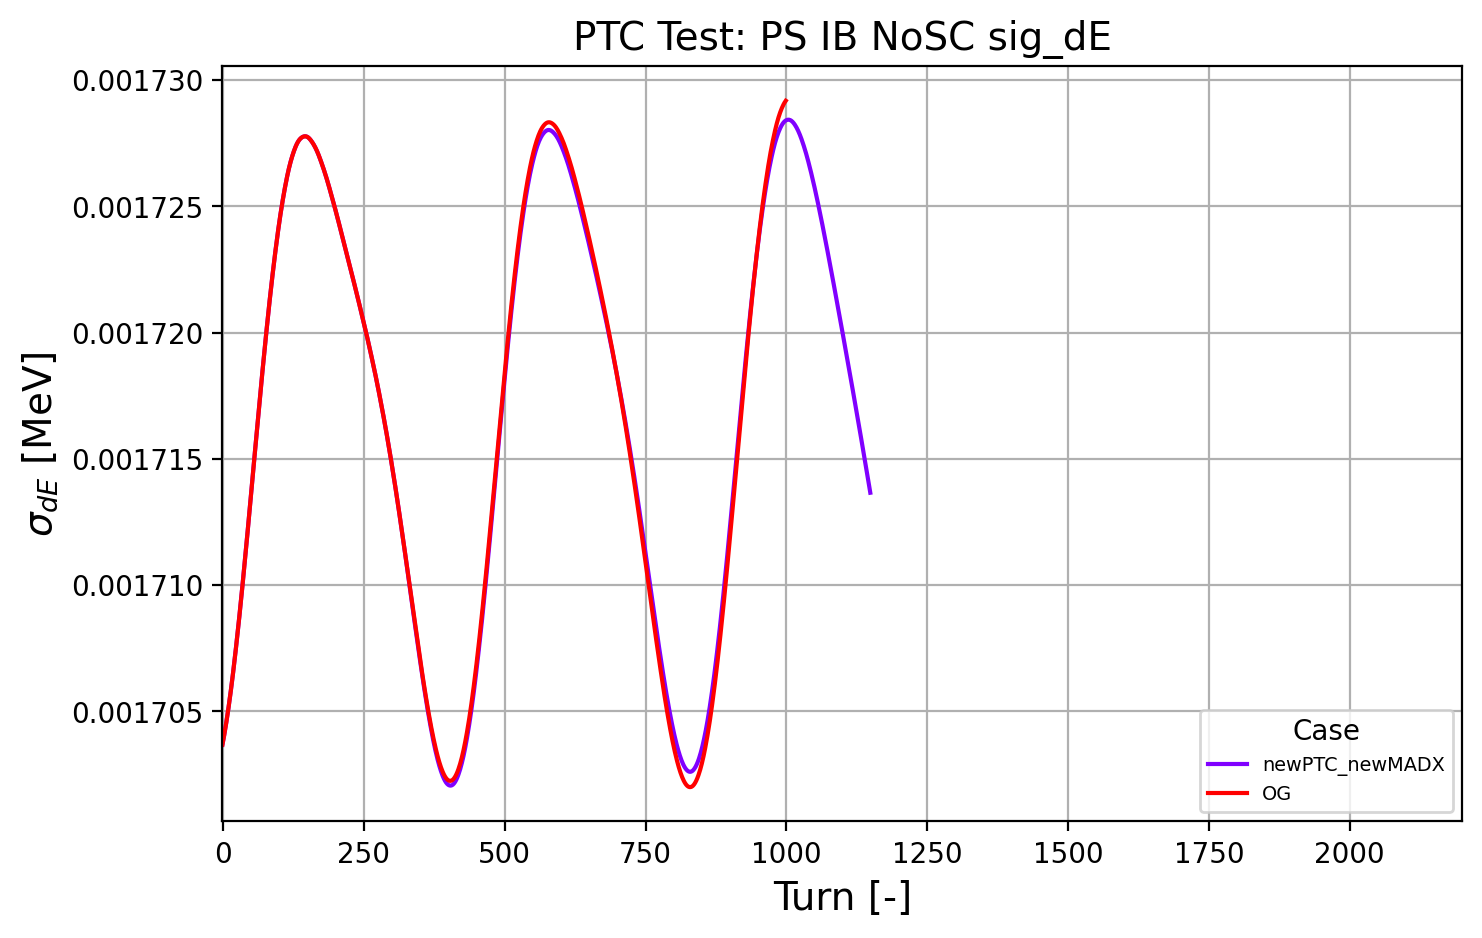

In [20]:
parameter = 'sig_dE'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

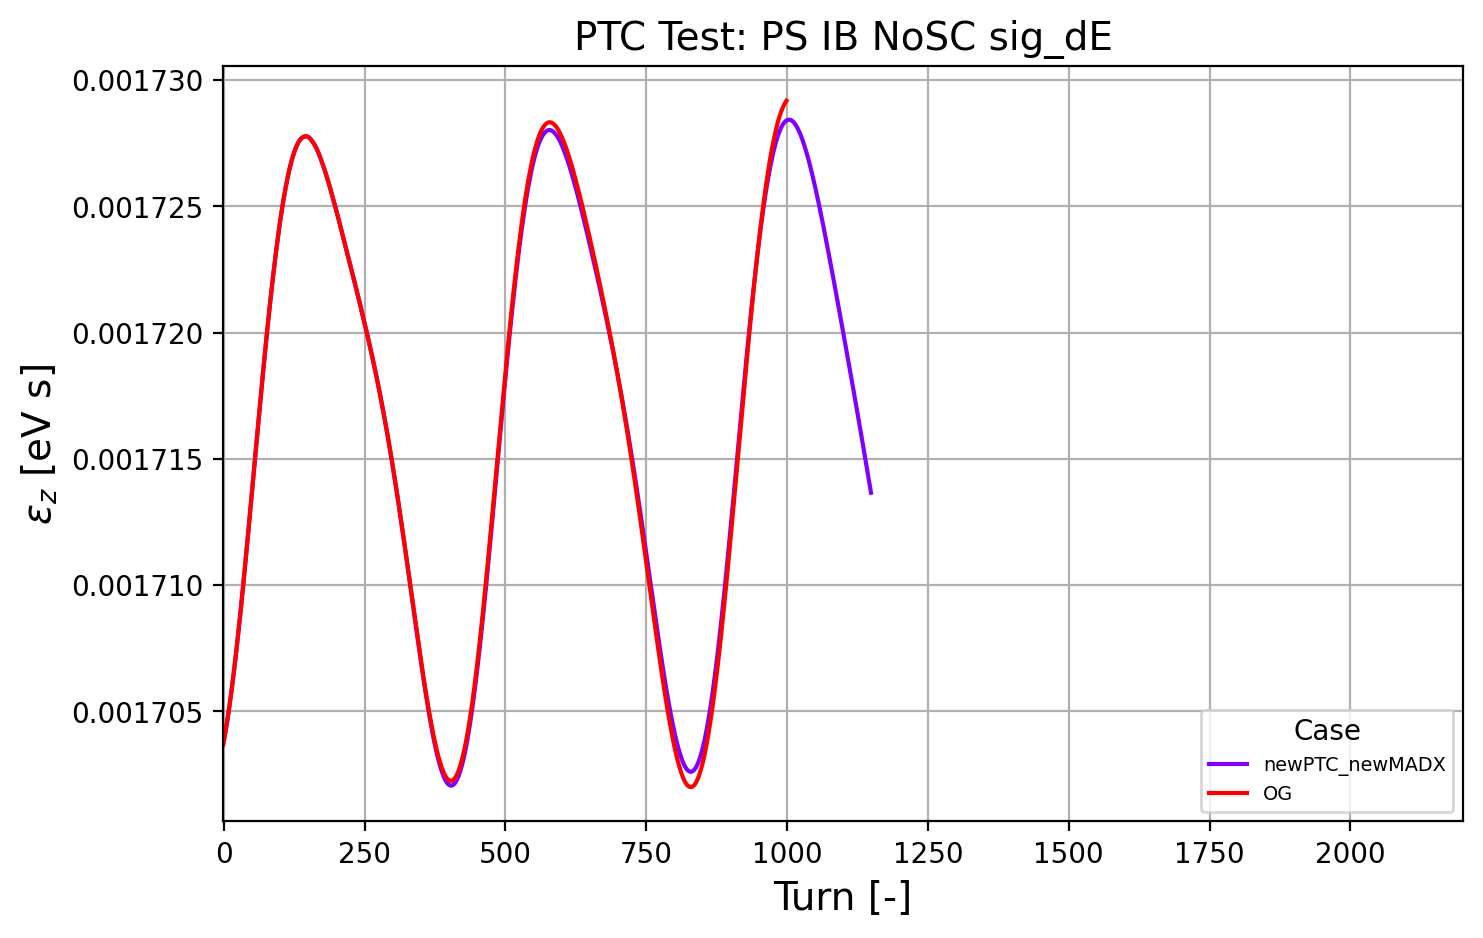

In [21]:
parameter = 'sig_dE'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_z$ [eV s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);


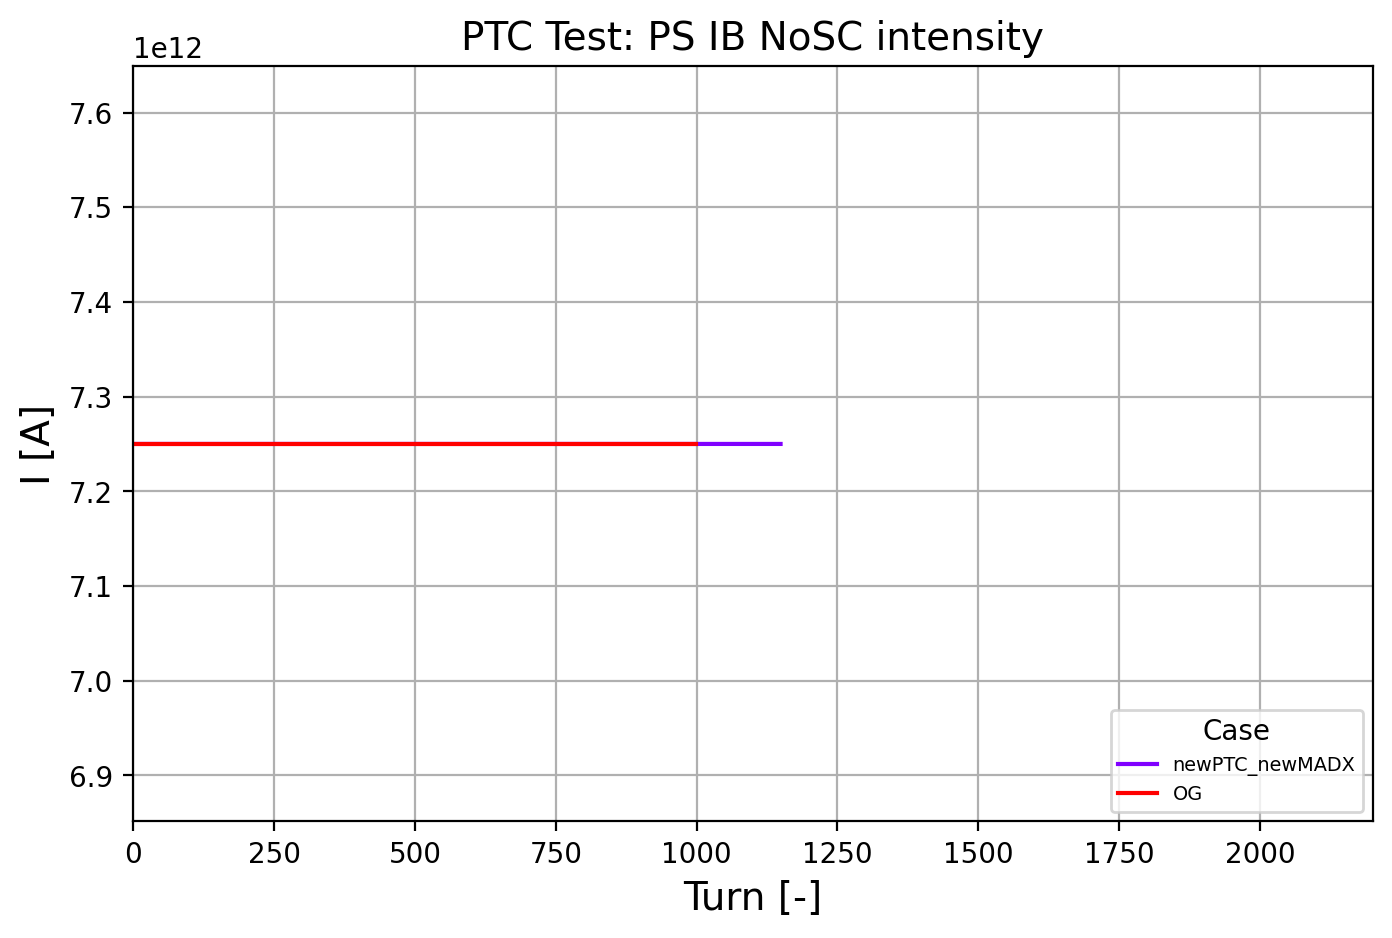

In [22]:
parameter = 'intensity'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('I [A]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

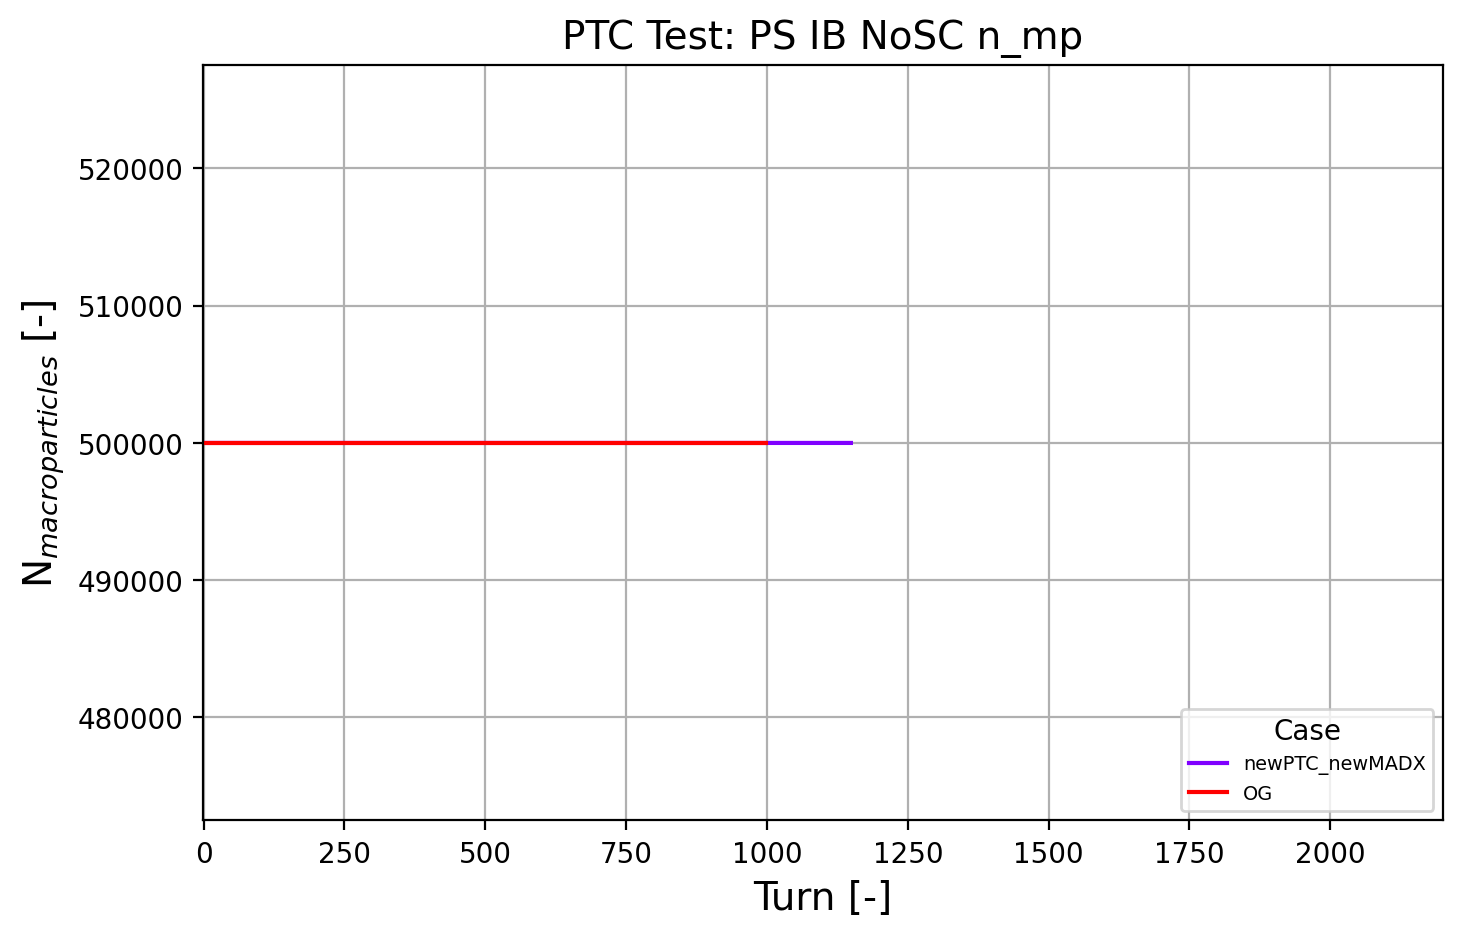

In [23]:
parameter = 'n_mp'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'N$_{macroparticles}$ [-]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

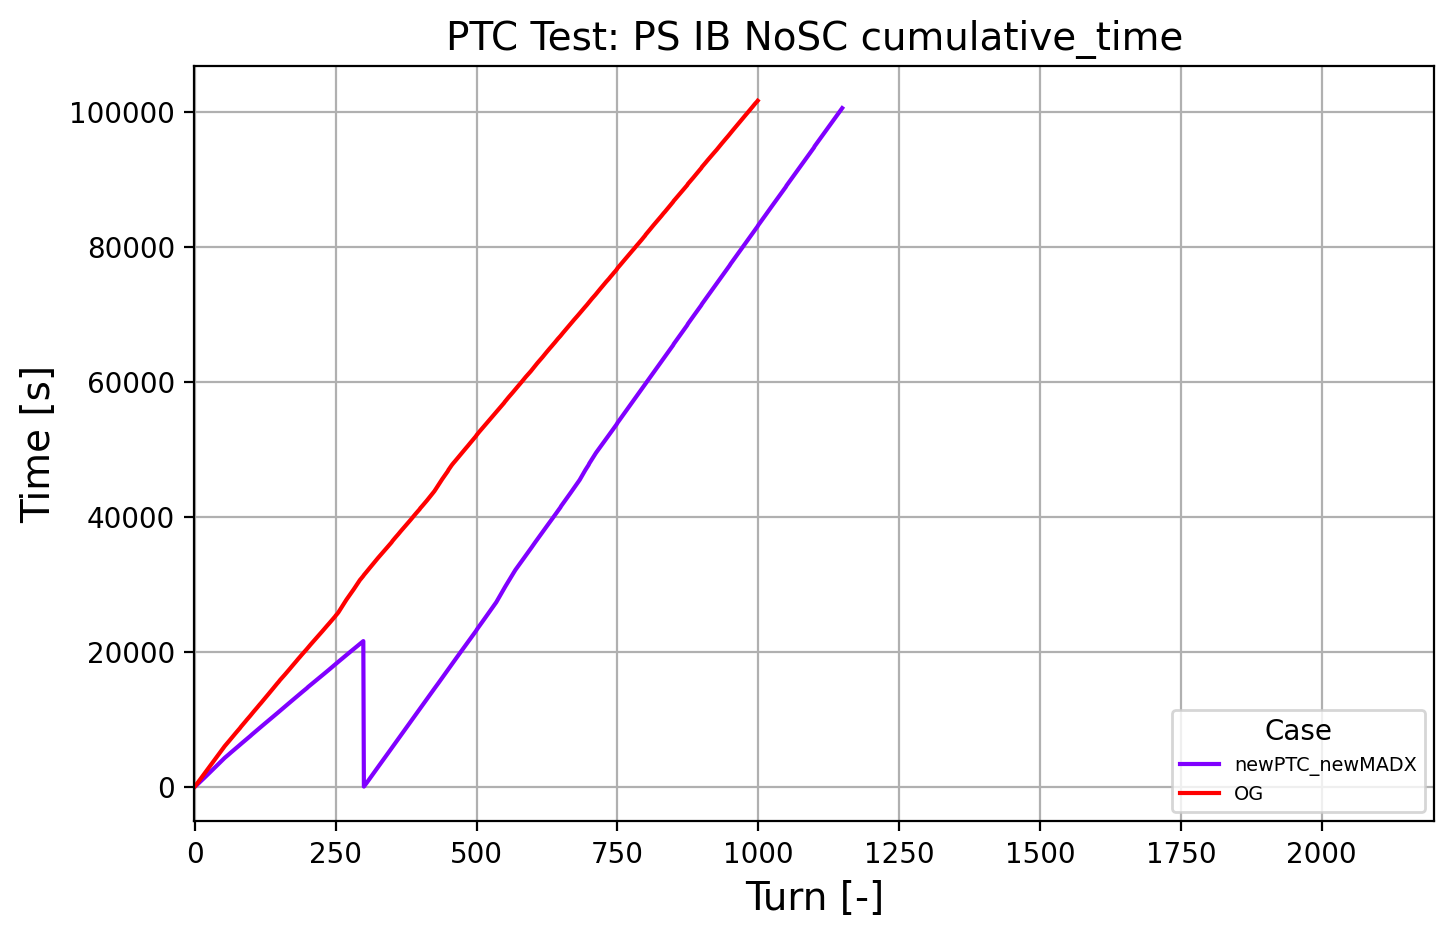

In [24]:
parameter = 'cumulative_time'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('Time [s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

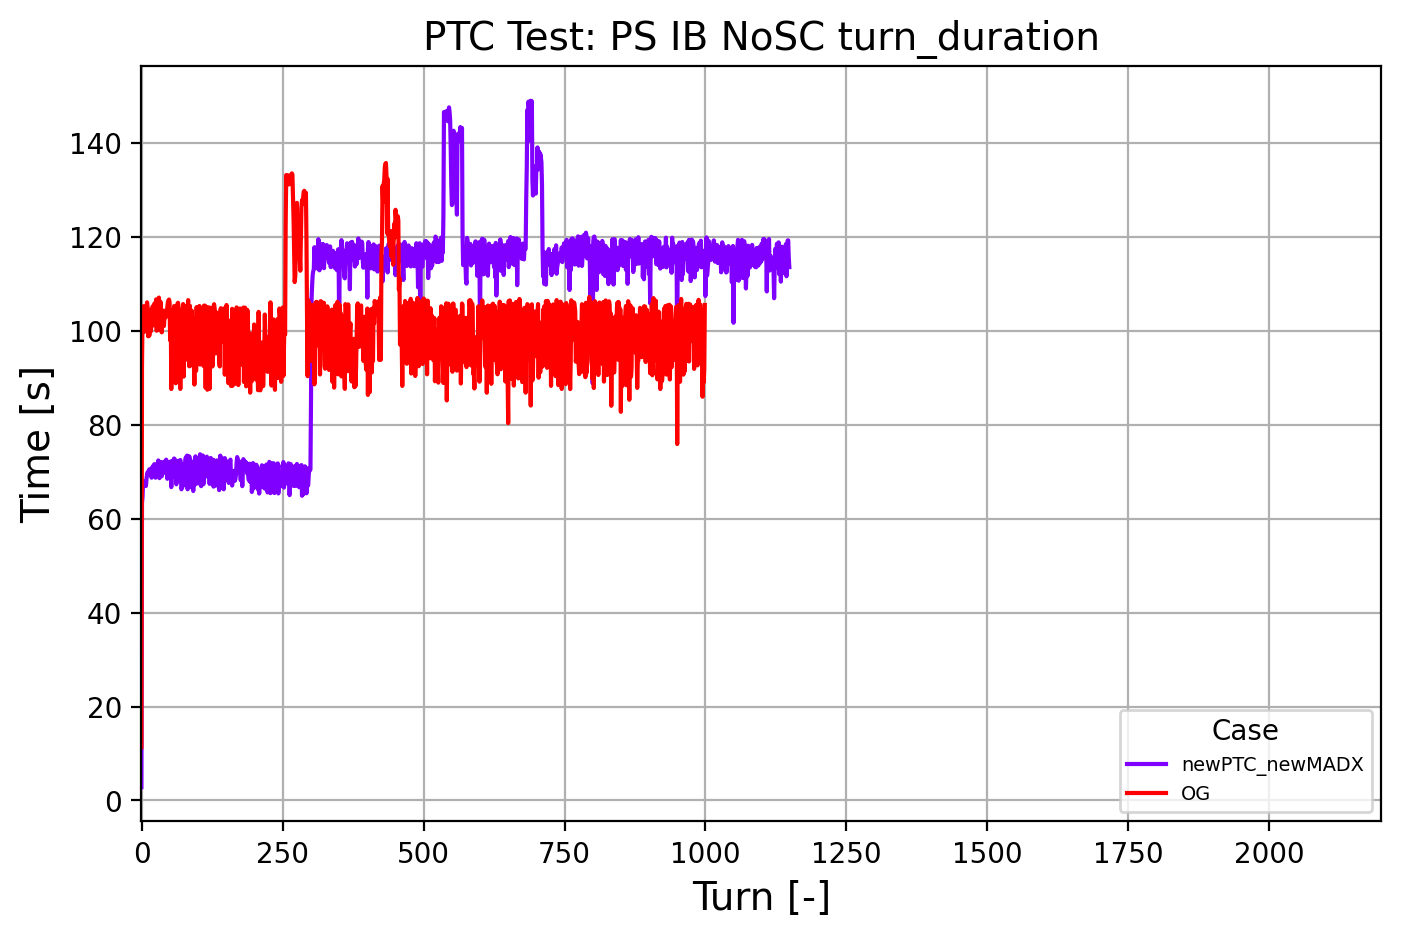

In [25]:
parameter = 'turn_duration'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('Time [s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

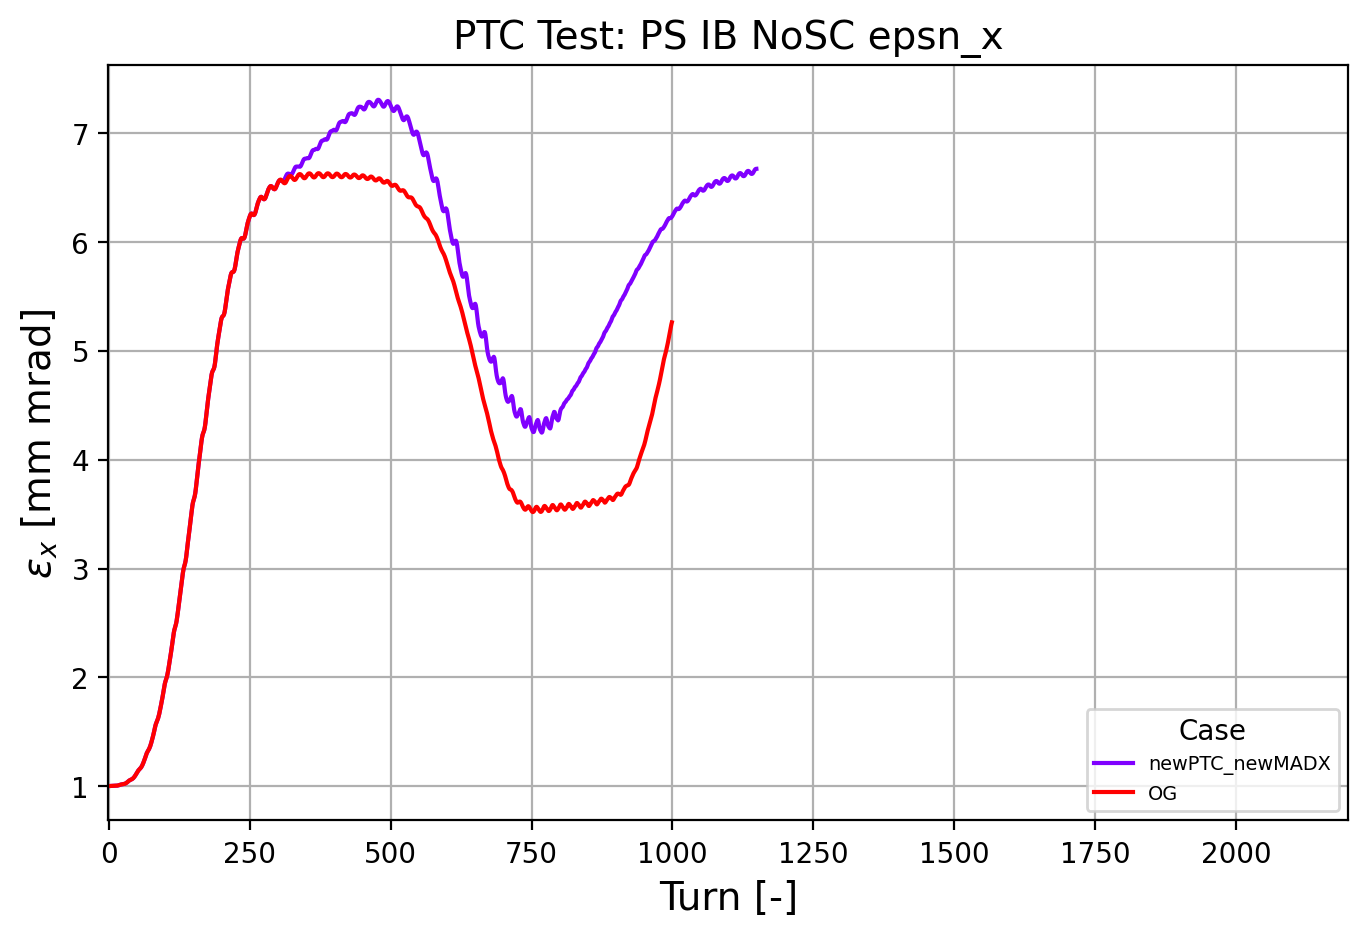

In [26]:
parameter = 'epsn_x'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

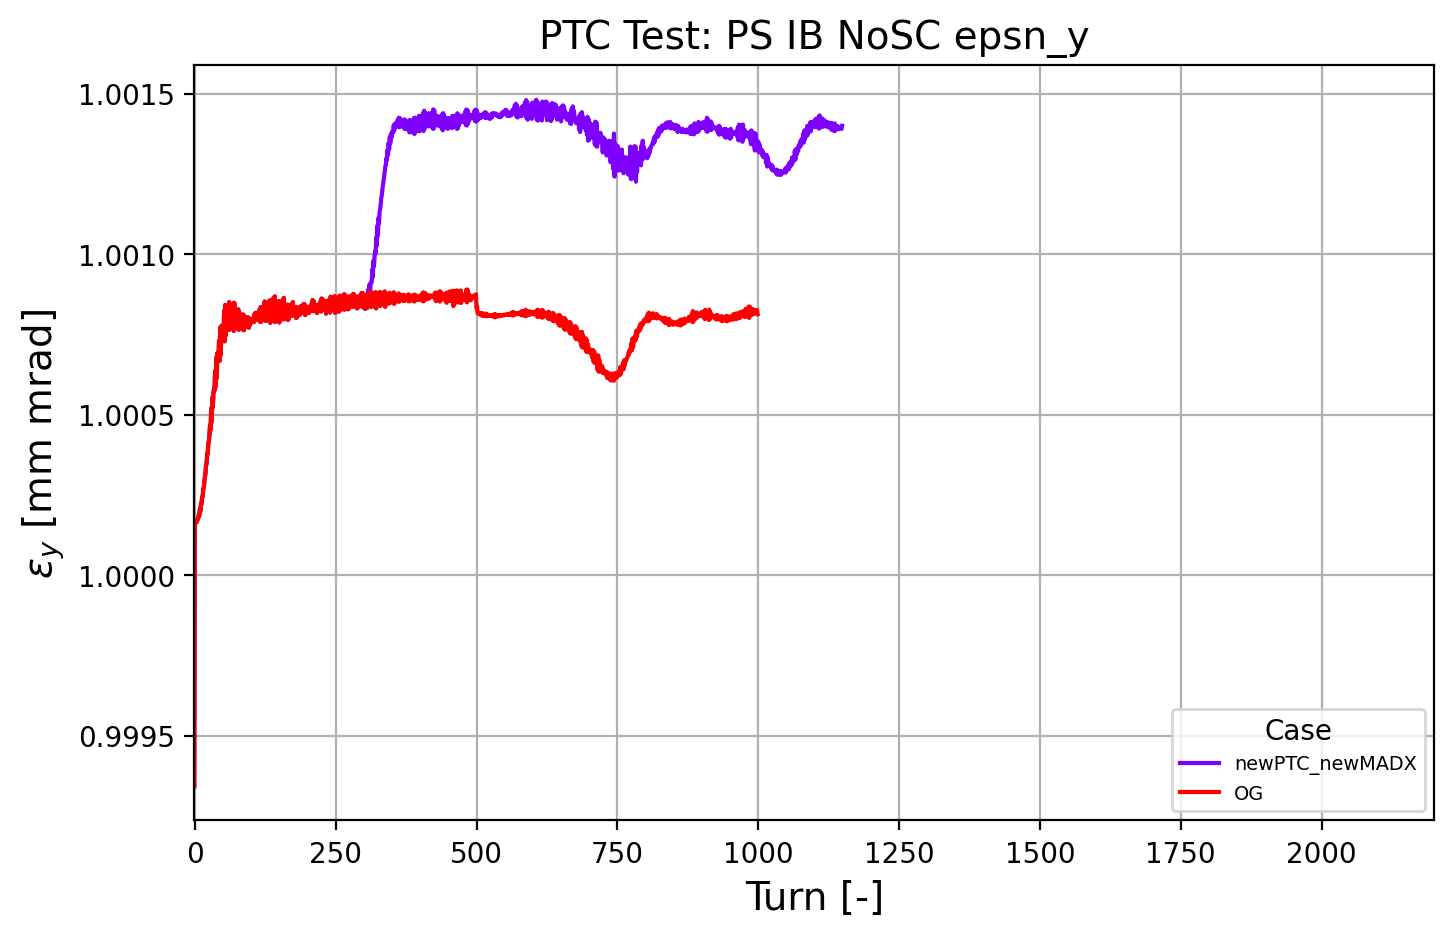

In [27]:
parameter = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

newPTC_newMADX Average  epsn_y  =  3.74  range =  3.15  =  84.2 %
OG Average  epsn_y  =  2.34  range =  2.81  =  121.0 %


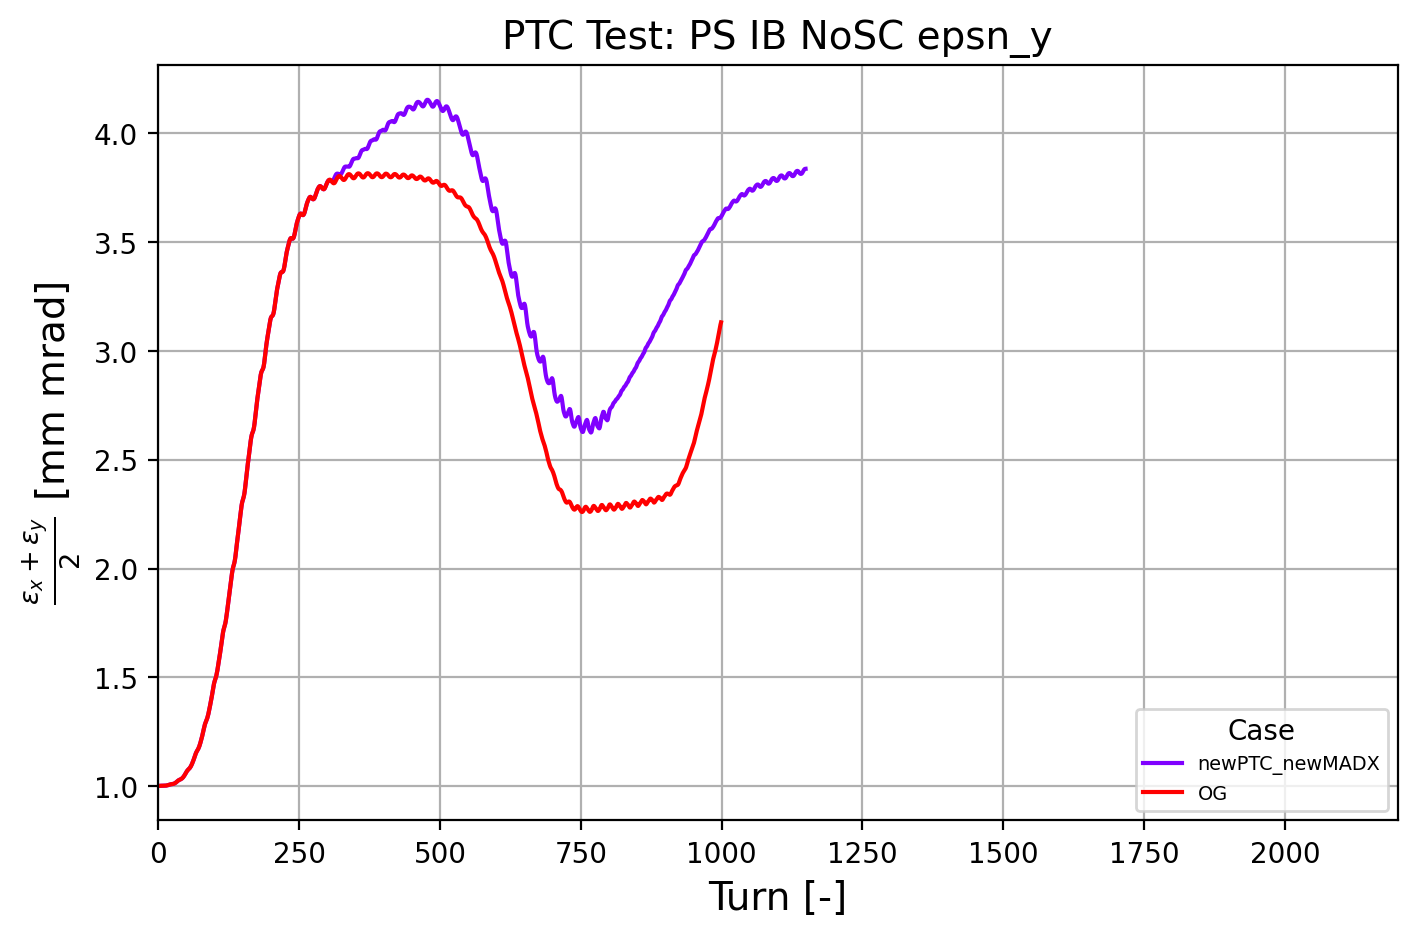

In [28]:
parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
    x = np.array(dd1[key]['turn'][0])
    y = np.array((dd1[key][parameter1][0]*multi + dd1[key][parameter2][0]*multi)/2)
    av_ = np.mean(y[-100])
    rang_ = np.abs(np.max(y) - np.min(y))
    print(key, 'Average ', parameter, ' = ' , \
    str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%')
    lab_ = key
    ax1.plot(x, y, label=lab_, color=colors[c_it]);
    c_it = c_it + 1;   
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '_average_emittance.png'
plt.savefig(savename);

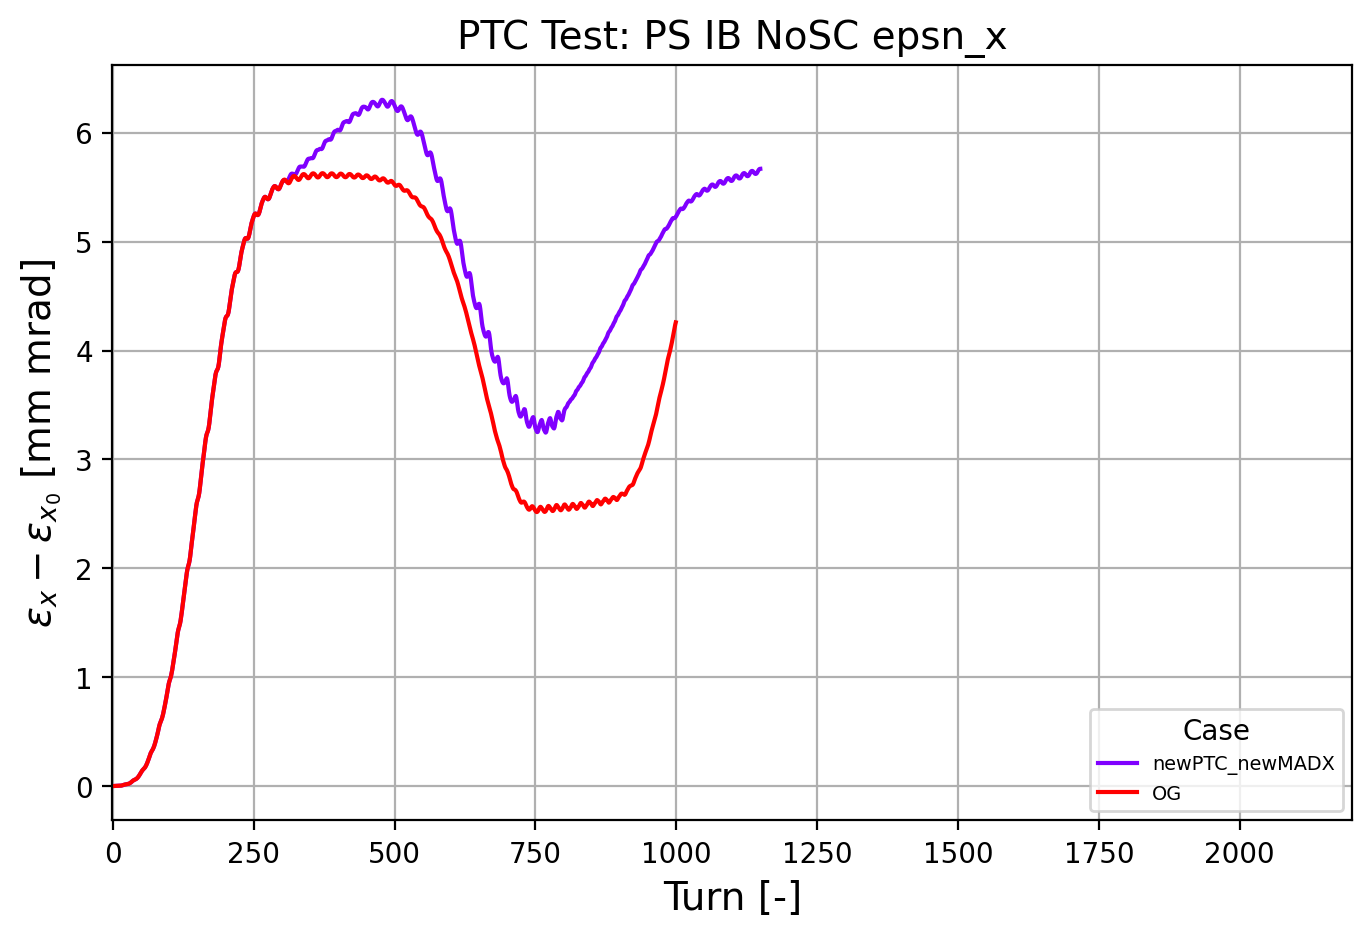

In [29]:
parameter = 'epsn_x'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x-\epsilon_{x_0}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
    lab_ = key
    ax1.plot(dd1[key]['turn'][0], ((dd1[key][parameter][0]*multi)-(dd1[key][parameter][0][0]*multi)), label=key, color=colors[c_it]);
    c_it = c_it + 1;   
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '_growth_cf.png'
plt.savefig(savename);

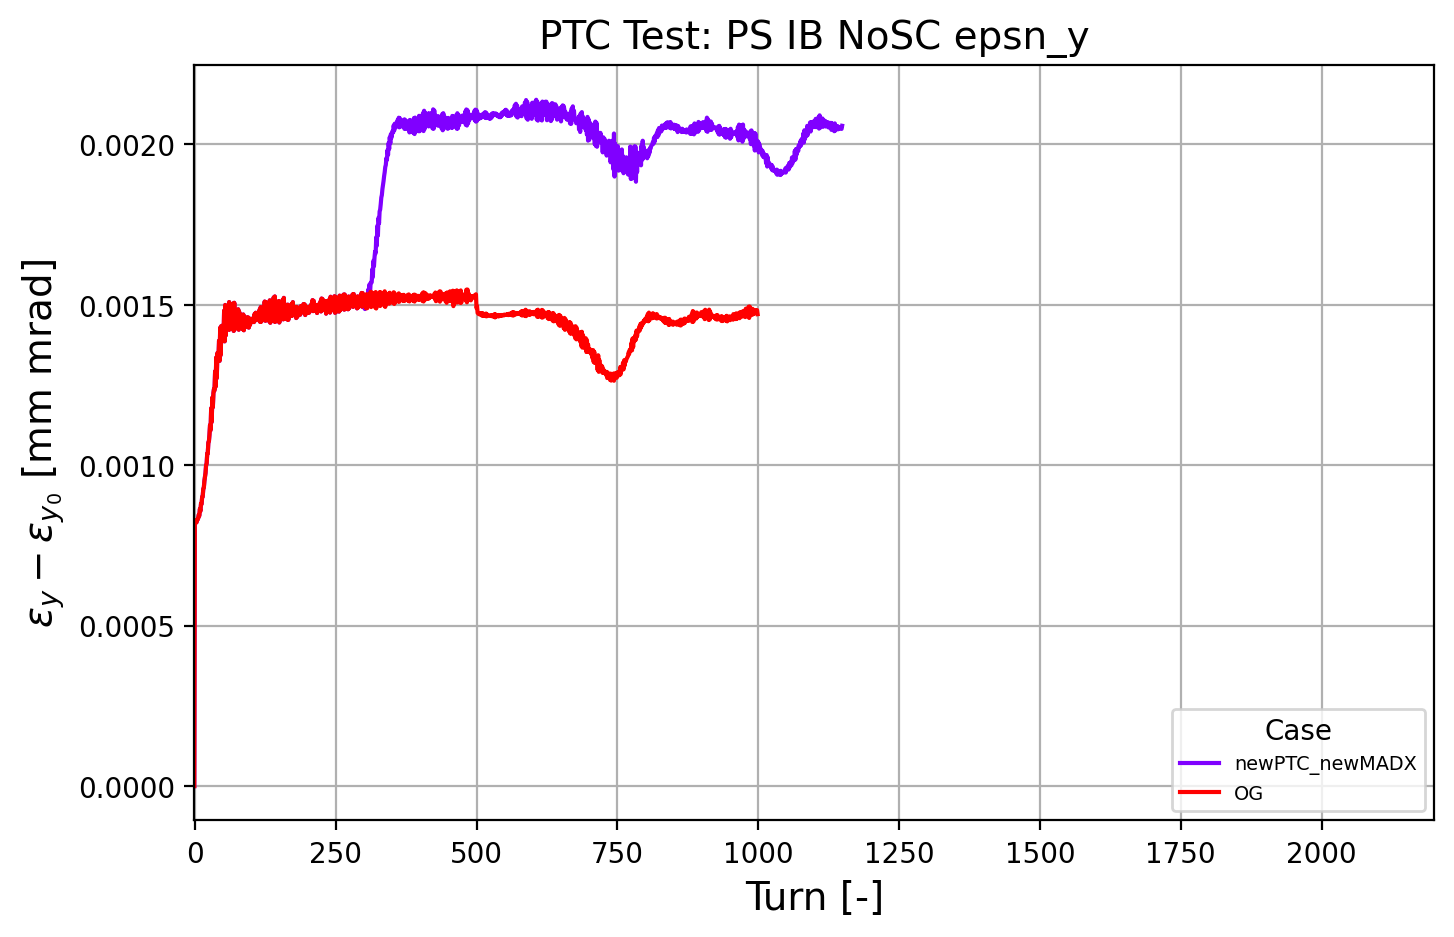

In [30]:
parameter = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y-\epsilon_{y_0}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
    lab_ = key
    ax1.plot(dd1[key]['turn'][0], ((dd1[key][parameter][0]*multi)-(dd1[key][parameter][0][0]*multi)), label=key, color=colors[c_it]);
    c_it = c_it + 1;   
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '_growth_cf.png'
plt.savefig(savename);